# `ANÁLISE DE DADOS AIRBNB`

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/AB_NYC_2019.csv')

In [ ]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


# 1.Qual o preço médio de todos os valores da cidade de Nova York?

In [ ]:
price_Aluguel = df.loc[:, 'price']

In [ ]:
media_Aluguel = np.mean(price_Aluguel)

print("A média dos aluguéis é:", media_Aluguel.round(2))

A média dos aluguéis é: 152.72


# 2.Qual os nomes distintos de todos os valores dos aluguéis da cidade de Nova York?

In [ ]:
name_City = df.loc[:, 'neighbourhood_group'].unique()

print(name_City)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


# 3.Qual o valor máximo da coluna que contém todos os valores dos aluguéis?

In [ ]:
price_Max = df.loc[:, 'price'].max()

print(price_Max)


10000


# 4.Quais são as categorias de imóveis que estão cadastrados dentro da base de dados da cidade de Nova York?


In [ ]:
room_Types = df.loc[:, 'room_type'].unique()

print(room_Types)


['Private room' 'Entire home/apt' 'Shared room']


# 5.Quantos usuários/host únicos estão cadastrados na base de dados da cidade de Nova York?

In [ ]:
hosts_Unico = df.loc[:,'host_id'].unique()

print(len(hosts_Unico))

37457


# 6.Qual o desvio padrão em torno da média dos preços dos imóveis?

In [ ]:
price = df.loc[:, 'price']

desvio_Padrao = np.std(price)

mean_Price = np.mean(price)

print(f"O desvio padrão é de: {desvio_Padrao:.2f}")

print(f"A média de preços é de: {mean_Price:.2f}")

#var =  df.loc[:, 'price'].std()




O devio padrão é de: 240.15
A média de preços é de: 152.72


# 7.Existem aluguéis mais baratos ou caros?

In [ ]:
from matplotlib import pyplot as plt

prices = df.loc[:, 'price'] < 1000

new_prices = df.loc[prices, 'price']

print(f'O maior valor do aluguel é de: {np.max(new_prices)}\n')
print(f'O menor valor do aluguel é de: {np.min(new_prices)}\n')


O maior valor do aluguel é de: 999

O menor valor do aluguel é de: 0



(array([19898., 17571.,  6604.,  2426.,   961.,   439.,   229.,   193.,
          156.,    65.,    55.]),
 array([  0.        ,  90.81818182, 181.63636364, 272.45454545,
        363.27272727, 454.09090909, 544.90909091, 635.72727273,
        726.54545455, 817.36363636, 908.18181818, 999.        ]),
 <BarContainer object of 11 artists>)

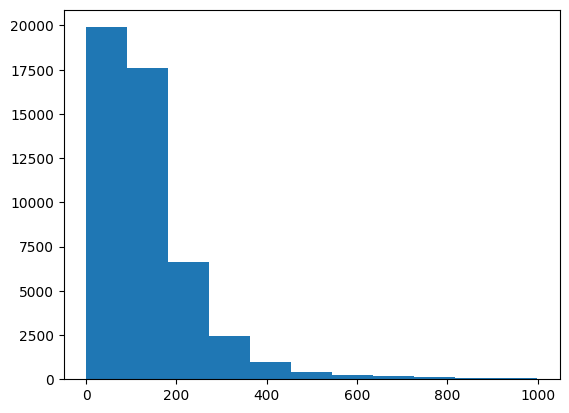

In [ ]:
plt.hist(new_prices, bins=(11))#(1000 - 0) / 100

# 8.Qual a distribuição do número de Reviews? Existem imóveis com muitos Reviews e outros com poucos?

(array([2.952e+04, 5.735e+03, 3.077e+03, 2.043e+03, 1.439e+03, 1.191e+03,
        9.180e+02, 7.930e+02, 6.130e+02, 5.220e+02, 4.580e+02, 3.550e+02,
        3.180e+02, 3.020e+02, 2.410e+02, 1.950e+02, 1.660e+02, 1.440e+02,
        1.130e+02, 1.060e+02, 1.190e+02, 7.700e+01, 8.100e+01, 5.600e+01,
        4.600e+01, 3.500e+01, 2.800e+01, 3.100e+01, 2.100e+01, 2.000e+01]),
 array([  0.        ,   9.96666667,  19.93333333,  29.9       ,
         39.86666667,  49.83333333,  59.8       ,  69.76666667,
         79.73333333,  89.7       ,  99.66666667, 109.63333333,
        119.6       , 129.56666667, 139.53333333, 149.5       ,
        159.46666667, 169.43333333, 179.4       , 189.36666667,
        199.33333333, 209.3       , 219.26666667, 229.23333333,
        239.2       , 249.16666667, 259.13333333, 269.1       ,
        279.06666667, 289.03333333, 299.        ]),
 <BarContainer object of 30 artists>)

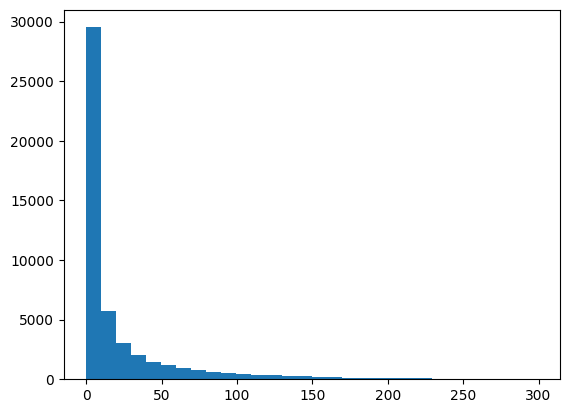

In [ ]:
reviews = df.loc[:, 'number_of_reviews'] < 300

new_reviews = df.loc[reviews, 'number_of_reviews']

plt.hist(new_reviews, bins=30)

# 9.Qual distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendados?

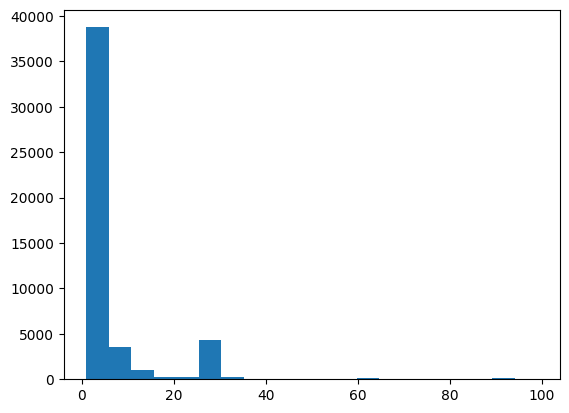

In [ ]:
pernoite = df.loc[:,'minimum_nights'] < 100

pernoites = df.loc[pernoite, 'minimum_nights']

plt.hist(pernoites, bins=20);

# 10.Qual a média e a mediana de imóveis cadastrados por host?

In [ ]:
hosts = df.loc[:, 'calculated_host_listings_count']

print(f'{np.mean(hosts):.2f}')

print(np.median(hosts))

7.14
1.0


# 11.Qual a data mais recente da última avaliação?

In [ ]:
data = df.loc[:, 'last_review'].sort_values(ascending = True)

print(f'A data mais recente é {data.loc[317]}')

A data mais recente é 2011-03-28


# 12.Qual o valor máximo de pernoites agendadas?

In [ ]:
pernoites_max = df.loc[:, 'minimum_nights'].sort_values(ascending = False)

print(pernoites_max.loc[5767])

1250
